In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
hrdata = pd.read_csv('WAFhr-attrition.csv')

In [3]:
print(hrdata.shape)
hrdata.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
hr_data=hrdata.drop(['EmployeeCount', 'StandardHours','EmployeeNumber','JobLevel'], axis=1)

In [36]:
hr_data.groupby('Attrition').mean().iloc[:,:20]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
Attrition,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954


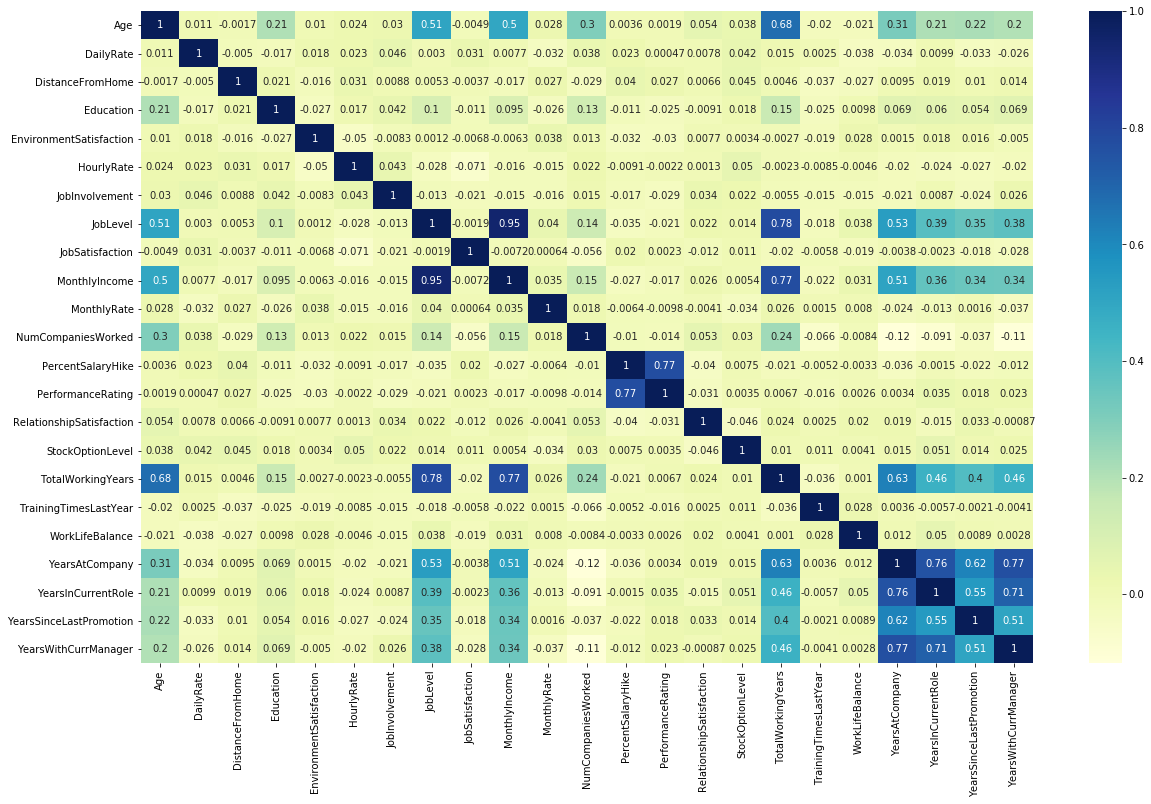

In [6]:
corr_matrix = hr_data.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [37]:
# change attrition to 0,1
hr_data['Attrition']=np.where(hr_data['Attrition']=='No',0,1)

In [38]:
numerical_df=hr_data.select_dtypes(include=np.number)
categorical_df=hr_data.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

In [39]:
print(numeric_cols)

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [40]:
print(categorical_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [41]:
categorical_df_dummies=pd.get_dummies(hr_data[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,3,4,1,6,3,3,2,2,2,2


In [42]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

In [43]:
#split with 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [58]:
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("-----",model_name,"-----")
    print("Accuracy: ",accuracy_score(pred_dt,y_te))
    print("ROC AUC Score:  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix:  \n",cm)
    print("-----Classification Report-----\n",classification_report(pred_dt,y_te))

In [59]:
#simple
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=3000)
model(lr,"Simple Logistic Regression",X_train,y_train,X_test,y_test)

----- Simple Logistic Regression -----
Accuracy:  0.8571428571428571
ROC AUC Score:   0.7472527472527473
Confusion Matrix:  
 [[239  34]
 [  8  13]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       273
           1       0.28      0.62      0.38        21

    accuracy                           0.86       294
   macro avg       0.62      0.75      0.65       294
weighted avg       0.92      0.86      0.88       294



/Users/tanya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_sm, y_sm=smote.fit_sample(X,y)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=100)
lr_sm=LogisticRegression(solver='lbfgs',max_iter=3000)

In [65]:
model(lr_sm,"Logistic Regression with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Logistic Regression with over-sampling -----
Accuracy:  0.8360323886639676
ROC AUC Score:   0.8360819672131147
Confusion Matrix:  
 [[205  39]
 [ 42 208]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       244
           1       0.84      0.83      0.84       250

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



/Users/tanya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_sm,X_train_sm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.289754
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1972
Model:                          Logit   Df Residuals:                     1929
Method:                           MLE   Df Model:                           42
Date:                Sun, 27 Sep 2020   Pseudo R-squ.:                  0.5820
Time:                        22:15:27   Log-Likelihood:                -571.39
converged:                       True   LL-Null:                       -1366.9
                                        LLR p-value:                1.446e-306
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BusinessTravel_Travel_Frequently      0.5190      0.274      1

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_sm=DecisionTreeClassifier() 
model(dt_sm,"Decision Tree with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Decision Tree with over-sampling -----
Accuracy:  0.8461538461538461
ROC AUC Score:   0.8467221592868049
Confusion Matrix:  
 [[204  33]
 [ 43 214]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       237
           1       0.87      0.83      0.85       257

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_sm=RandomForestClassifier() #n_estimators=10,max_depth=4
model(rf_sm,"Random Forest with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Random Forest with over-sampling -----
Accuracy:  0.9311740890688259
ROC AUC Score:   0.931881987883564
Confusion Matrix:  
 [[235  22]
 [ 12 225]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       257
           1       0.91      0.95      0.93       237

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

